<a href="https://colab.research.google.com/github/prog815/traide/blob/main/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключаем библиотеки

In [ ]:
! pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=60ab95d11d710b32ae989d9695519c8f55d149edec2fa14b62fde4b8d5dd19a8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Загрузка котировок

## список тикеров

In [ ]:
acc_list = "TGKA	FEES	VTBR	TGKB	HYDR	TGKD	TGKN	RSTI	ENRU	SNGS	MRKV	GAZP	MRKZ	MRKP	SNGSP	MAGN	TGKDP	MSNG	MRKC	MRKU	NMTP	NLMK	MTLR	AFLT	MSRS	ROSN	TTLK	FESH	TRMK	RSTIP	RTKM	SIBN	AMEZ	ISKJ	DVEC	RASP	RTKMP	UTAR	LSNG	BSPB	MRKS	MVID	NKNCP	LSNGP	PIKK	KMAZ	IRKT	SVAV	CHEP	MRKK	KUBE	ROSB	KROT".split('\t')
acc_list = [f'{name}.ME' for name in acc_list]
np.array(acc_list)

array(['TGKA.ME', 'FEES.ME', 'VTBR.ME', 'TGKB.ME', 'HYDR.ME', 'TGKD.ME',
       'TGKN.ME', 'RSTI.ME', 'ENRU.ME', 'SNGS.ME', 'MRKV.ME', 'GAZP.ME',
       'MRKZ.ME', 'MRKP.ME', 'SNGSP.ME', 'MAGN.ME', 'TGKDP.ME', 'MSNG.ME',
       'MRKC.ME', 'MRKU.ME', 'NMTP.ME', 'NLMK.ME', 'MTLR.ME', 'AFLT.ME',
       'MSRS.ME', 'ROSN.ME', 'TTLK.ME', 'FESH.ME', 'TRMK.ME', 'RSTIP.ME',
       'RTKM.ME', 'SIBN.ME', 'AMEZ.ME', 'ISKJ.ME', 'DVEC.ME', 'RASP.ME',
       'RTKMP.ME', 'UTAR.ME', 'LSNG.ME', 'BSPB.ME', 'MRKS.ME', 'MVID.ME',
       'NKNCP.ME', 'LSNGP.ME', 'PIKK.ME', 'KMAZ.ME', 'IRKT.ME', 'SVAV.ME',
       'CHEP.ME', 'MRKK.ME', 'KUBE.ME', 'ROSB.ME', 'KROT.ME'], dtype='<U8')

## Загрузка из сети

In [ ]:
all_data = yf.download(acc_list,period='10y',threads=False)


[*********************100%***********************]  53 of 53 completed


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2011-08-08 to 2021-08-06
Columns: 318 entries, ('Adj Close', 'AFLT.ME') to ('Volume', 'VTBR.ME')
dtypes: float64(318)
memory usage: 6.1 MB


In [ ]:
all_data

Adj Close                        ...     Volume                       
              AFLT.ME    AMEZ.ME    BSPB.ME  ...    TTLK.ME  UTAR.ME       VTBR.ME
Date                                         ...                                  
2011-08-08  45.696564  11.232000  89.908112  ...     1494.0   2884.0  1.139379e+07
2011-08-09  42.845097  10.900000  82.305733  ...     1174.0   2194.0  1.032796e+07
2011-08-10  41.024548  10.500000  79.093452  ...     1322.0   4289.0  1.620846e+07
2011-08-11  41.287762  10.285000  77.458755  ...     1852.0   5055.0  2.272840e+07
2011-08-12  41.287762  10.285000  77.458755  ...        0.0      0.0  0.000000e+00
...               ...        ...        ...  ...        ...      ...           ...
2021-08-02  66.620003  16.900000  65.349998  ...  5350001.0  21500.0  4.870981e+10
2021-08-03  66.919998  16.920000  66.059998  ...  4500000.0   8601.0  3.073849e+10
2021-08-04  66.879997  16.570000  66.680000  ...  3010002.0  18103.0  2.458746e+10
2021-08-05  67.080002  16.379999  70.489998  ...  3020002.0  18409.0  3.583247e+10
2021-08-06  66.860001  16.129999  70.910004  ...  6420001.0  93497.0  4.102247e+10

[2507 rows x 318 columns]

In [ ]:
data = all_data['Close']
data

,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,IRKT.ME,ISKJ.ME,KMAZ.ME,KROT.ME,KUBE.ME,LSNG.ME,LSNGP.ME,MAGN.ME,MRKC.ME,MRKK.ME,MRKP.ME,MRKS.ME,MRKU.ME,MRKV.ME,MRKZ.ME,MSNG.ME,MSRS.ME,MTLR.ME,MVID.ME,NKNCP.ME,NLMK.ME,NMTP.ME,PIKK.ME,RASP.ME,ROSB.ME,ROSN.ME,RSTI.ME,RSTIP.ME,RTKM.ME,RTKMP.ME,SIBN.ME,SNGS.ME,SNGSP.ME,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-08-08,62.500000,11.232000,124.096619,78.389999,0.8951,2.2020,0.32000,11.484000,176.199997,1.2770,7.576000,10.205000,50.680000,226.029999,110.800003,16.424,32.319000,19.274000,0.8570,80.869255,0.1820,0.1720,0.2160,0.10600,0.11000,2.2259,1.5600,564.500000,218.600006,13.686000,90.330002,2.925,93.830002,136.518082,89.370003,212.500000,3.098941,2.160,167.529999,82.010002,121.209999,25.226000,13.051000,384.600006,0.01300,0.00500,0.01000,0.00683,0.00200,108.370003,0.2100,14.385,0.076452
2011-08-09,58.599998,10.900000,113.603333,72.309998,0.8700,2.1400,0.29800,10.760000,167.059998,1.2230,6.930000,10.115000,49.990002,205.009995,99.500000,14.670,33.799000,19.646000,0.8400,71.113068,0.1730,0.1570,0.1980,0.09800,0.10800,2.0400,1.4730,587.700012,216.880005,13.595000,88.750000,2.700,102.599998,127.608215,101.000000,208.300003,2.916477,2.060,160.570007,82.510002,119.500000,23.813999,12.583000,390.000000,0.01200,0.00500,0.01000,0.00656,0.00200,104.000000,0.2160,14.350,0.075472
2011-08-10,56.110001,10.500000,109.169556,71.510002,0.8061,2.0450,0.28400,10.202000,158.279999,1.1830,6.601000,10.149000,47.009998,193.000000,93.000000,14.000,28.302000,18.152000,0.8270,65.841713,0.1690,0.1570,0.1980,0.09500,0.10500,1.9360,1.4200,533.599976,217.789993,13.051000,81.540001,2.670,104.000000,124.038261,100.500000,196.300003,2.613684,1.949,151.000000,78.199997,118.500000,22.865000,11.972000,364.000000,0.01100,0.00500,0.00900,0.00640,0.00200,100.099998,0.2050,13.650,0.068611
2011-08-11,56.470001,10.285000,106.913254,68.279999,0.8008,2.0290,0.27000,10.445000,160.039993,1.1790,6.464000,9.663000,43.490002,196.000000,91.760002,14.170,29.608000,17.573000,0.8070,63.021957,0.1640,0.1530,0.1850,0.09100,0.10100,1.8876,1.3810,530.900024,206.100006,13.000000,80.330002,2.653,104.800003,122.908279,99.510002,193.580002,2.515054,1.888,135.830002,76.129997,118.559998,21.921000,11.775000,346.200012,0.01000,0.00400,0.00900,0.00586,0.00200,92.709999,0.2000,12.318,0.067631
2011-08-12,56.470001,10.285000,106.913254,68.279999,0.8008,2.0290,0.27000,10.445000,160.039993,1.1790,6.464000,9.663000,43.490002,196.000000,91.760002,14.170,29.608000,17.573000,0.8070,63.021957,0.1640,0.1530,0.1850,0.09100,0.10100,1.8876,1.3810,530.900024,206.100006,13.000000,80.330002,2.653,104.800003,122.908279,99.510002,193.580002,2.515054,1.888,135.830002,76.129997,118.559998,21.921000,11.775000,346.200012,0.01000,0.00400,0.00900,0.00586,0.00200,92.709999,0.2000,12.318,0.067631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,66.620003,16.900000,65.349998,308.500000,0.7850,0.8302,0.20014,17.860001,286.149994,0.8227,24.420000,56.000000,72.599998,389.000000,65.400002,6.170,164.050003,69.050003,0.3954,27.299999,0.2426,0.2985,0.1518,0.05640,0.04930,2.2065,1.2415,81.550003,640.099976,91.800003,256.359985,7.320,1175.099976,262.700012,78.000000,549.500000,1.306900,1.920,93.230003,84.599998,422.500000,32.619999,37.924999,206.000000,0.01148,0.00400,0.00605,0.00559,0.00276,101.879997,0.5600,6.770,0.048980
2021-08-03,66.919998,16.920000,66.059998,311.000000,0.7760,0.8250,0.19866,17.670000,286.899994,0.8240,24.260000,66.389999,72.500000,388.000000,64.099998,6.100,163.699997,69.095001,0.3936,27.000000,0.2424,0.3080,0.1480,0.05550,0.04900,2.1900,1.2340,81.500000,642.900024,93.760002,258.239990,7.335,1177.800049,258.940002,78.800003,547.150024,1.286500,1.924,93

In [ ]:
dData = data.pct_change()
dData

,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,IRKT.ME,ISKJ.ME,KMAZ.ME,KROT.ME,KUBE.ME,LSNG.ME,LSNGP.ME,MAGN.ME,MRKC.ME,MRKK.ME,MRKP.ME,MRKS.ME,MRKU.ME,MRKV.ME,MRKZ.ME,MSNG.ME,MSRS.ME,MTLR.ME,MVID.ME,NKNCP.ME,NLMK.ME,NMTP.ME,PIKK.ME,RASP.ME,ROSB.ME,ROSN.ME,RSTI.ME,RSTIP.ME,RTKM.ME,RTKMP.ME,SIBN.ME,SNGS.ME,SNGSP.ME,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,-0.062400,-0.029558,-0.084557,-0.077561,-0.028042,-0.028156,-0.068750,-0.063044,-0.051873,-0.042287,-0.085269,-0.008819,-0.013615,-0.092997,-0.101986,-0.106795,0.045793,0.019301,-0.019837,-0.120641,-0.049451,-0.087209,-0.083333,-0.075472,-0.018182,-0.083517,-0.055769,0.041098,-0.007868,-0.006649,-0.017491,-0.076923,0.093467,-0.065265,0.130133,-0.019765,-0.058880,-0.046296,-0.041545,0.006097,-0.014108,-0.055974,-0.035859,0.014041,-0.076923,0.000000,0.000000,-0.039531,0.000000,-0.040325,0.028571,-0.002433,-0.012819
2011-08-10,-0.042491,-0.036697,-0.039029,-0.011063,-0.073448,-0.044393,-0.046980,-0.051859,-0.052556,-0.032707,-0.047475,0.003361,-0.059612,-0.058582,-0.065327,-0.045671,-0.162638,-0.076046,-0.015476,-0.074126,-0.023121,0.000000,0.000000,-0.030612,-0.027778,-0.050980,-0.035981,-0.092054,0.004196,-0.040015,-0.081239,-0.011111,0.013645,-0.027976,-0.004950,-0.057609,-0.103822,-0.053883,-0.059600,-0.052236,-0.008368,-0.039850,-0.048558,-0.066667,-0.083333,0.000000,-0.100000,-0.024390,0.000000,-0.037500,-0.050926,-0.048781,-0.090908
2011-08-11,0.006416,-0.020476,-0.020668,-0.045169,-0.006575,-0.007824,-0.049296,0.023819,0.011120,-0.003381,-0.020754,-0.047886,-0.074878,0.015544,-0.013333,0.012143,0.046145,-0.031897,-0.024184,-0.042826,-0.029586,-0.025478,-0.065657,-0.042105,-0.038095,-0.025000,-0.027465,-0.005060,-0.053676,-0.003908,-0.014839,-0.006367,0.007692,-0.009110,-0.009851,-0.013856,-0.037736,-0.031298,-0.100464,-0.026471,0.000506,-0.041286,-0.016455,-0.048901,-0.090909,-0.200000,0.000000,-0.084375,0.000000,-0.073826,-0.024390,-0.097582,-0.014283
2011-08-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,-0.012452,0.030488,0.007710,0.011475,0.002554,0.009976,-0.009012,-0.013260,0.003683,0.017689,0.000820,0.113320,0.005540,-0.001284,0.006154,0.003252,0.017996,0.004583,-0.000506,0.008124,-0.005738,-0.026101,0.001319,0.007143,0.010246,0.022001,0.002422,0.013044,-0.001560,0.102306,-0.005740,0.016667,0.020672,0.020749,-0.005102,0.011319,-0.019286,0.003659,-0.002034,-0.006459,-0.006700,0.004001,-0.005507,0.017284,0.023173,0.000000,-0.003295,-0.001786,-0.010753,0.021866,0.008101,-0.001475,0.010314
2021-08-03,0.004503,0.001183,0.010865,0.008104,-0.011465,-0.006264,-0.007395,-0.010638,0.002621,0.001580,-0.006552,0.185536,-0.001377,-0.002571,-0.019878,-0.011345,-0.002134,0.000652,-0.004552,-0.010989,-0.000824,0.031826,-0.025033,-0.015957,-0.006085,-0.007478,-0.006041,-0.000613,0.004374,0.021351,0.007333,0.002049,0.002298,-0.014313,0.010256,-0.004277,-0.015609,0.002083,0.001823,0.004728,0.008284,-0.000766,-0.002241,0.007282,-0.006969,0.007500,-0.024793,0.001789,0.000000,-0.0

In [ ]:
dData.describe()

,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,IRKT.ME,ISKJ.ME,KMAZ.ME,KROT.ME,KUBE.ME,LSNG.ME,LSNGP.ME,MAGN.ME,MRKC.ME,MRKK.ME,MRKP.ME,MRKS.ME,MRKU.ME,MRKV.ME,MRKZ.ME,MSNG.ME,MSRS.ME,MTLR.ME,MVID.ME,NKNCP.ME,NLMK.ME,NMTP.ME,PIKK.ME,RASP.ME,ROSB.ME,ROSN.ME,RSTI.ME,RSTIP.ME,RTKM.ME,RTKMP.ME,SIBN.ME,SNGS.ME,SNGSP.ME,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,0.000269,0.000492,-0.000027,0.001166,0.000481,-0.000228,0.000108,0.000590,0.000392,0.000032,0.000921,0.001366,0.000400,0.001070,0.000264,-0.000098,0.000908,0.000728,-0.000092,-0.000075,0.000370,0.000691,0.000143,0.000033,-0.000018,0.000180,0.000069,-0.000051,0.000635,0.001045,0.000616,0.000579,0.001318,0.000595,0.000232,0.000544,0.000022,0.000198,-0.000086,0.000151,0.000611,0.000278,0.000574,-0.000035,0.000239,0.000712,0.000226,0.000611,0.000786,0.000266,0.000634,0.000065,0.000032
std,0.021918,0.026660,0.019751,0.036076,0.032760,0.017767,0.024493,0.029123,0.020233,0.020370,0.030883,0.036323,0.022919,0.042512,0.031723,0.024548,0.022777,0.020911,0.021073,0.027109,0.022507,0.031089,0.024386,0.024369,0.024657,0.019309,0.018311,0.038343,0.020133,0.023693,0.019946,0.020448,0.024975,0.026248,0.024327,0.018249,0.027474,0.022186,0.016494,0.015486,0.014662,0.018193,0.017400,0.020672,0.023767,0.041031,0.030609,0.037727,0.036496,0.024062,0.022579,0.027971,0.020213
min,-0.201767,-0.151613,-0.190170,-0.293333,-0.296339,-0.272902,-0.231748,-0.217164,-0.170380,-0.155158,-0.343871,-0.228360,-0.141200,-0.406615,-0.164678,-0.121302,-0.162638,-0.154411,-0.116015,-0.151394,-0.133333,-0.138756,-0.142804,-0.157895,-0.166000,-0.148153,-0.208271,-0.406250,-0.191935,-0.271523,-0.117601,-0.159509,-0.271518,-0.216867,-0.140238,-0.169106,-0.221884,-0.168985,-0.105646,-0.150000,-0.136115,-0.135790,-0.176520,-0.151376,-0.169708,-0.358586,-0.181992,-0.394737,-0.274510,-0.168975,-0.285714,-0.194175,-0.182012
25%,-0.010255,-0.011548,-0.008850,-0.009864,-0.011765,-0.006334,-0.010845,-0.012075,-0.008850,-0.009680,-0.009918,-0.013287,-0.008447,-0.011594,-0.011818,-0.010202,-0.007485,-0.011158,-0.009832,-0.011931,-0.008918,-0.012732,-0.010500,-0.010969,-0.012064,-0.008922,-0.007789,-0.015041,-0.007649,-0.005859,-0.010639,-0.008592,-0.006594,-0.012159,-0.010101,-0.008673,-0.012804,-0.009170,-0.007276,-0.005475,-0.006363,-0.009022,-0.007523,-0.008745,-0.009798,-0.010204,-0.010907,-0.011867,-0.009677,-0.009377,-0.007013,-0.007937,-0.008810
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000640,0.000000,-0.000188,-0.000568,0.000000,0.000000,0.000000,0.000000,-0.000482,0.000000,0.000705,-0.000668,-0.000721,0.000000,0.000000,0.000000,-0.000516,0.000000,0.000000,0.000000,-0.001258,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000927,0.000000,0.000000,-0.000331,0.000000,0.000000,0.000000,0.000508,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010170,0.010000,0.007894,0.009875,0.010229,0.006681,0.010423,0.009591,0.009179,0.009388,0.009101,0.010165,0.007005,0.008295,0.009370,0.008527,0.008410,0.011789,0.008896,0.008550,0.008673,0.010782,0.009340,0.008968,0.010816,0.007983,0.007568,0.011657,0.008786,0.007235,0.011426,0.008333,0.007814,0.011144,0.007748,0.009481,0.011621,0.008028,0.006503,0.005676,0.007595,0.008741,0.009382,0.007

# Подготовка данных

## задержки

In [ ]:
glub = 3
inpData = np.hstack([dData.shift(n+1).values for n in range(glub)])
outData = dData.values

## Чистим пустоты

In [ ]:
index = ~(np.isnan(inpData).any(axis=1) | np.isnan(outData).any(axis=1))
inpData = inpData[index,:]
outData = (outData[index,:] > 0)*1
inpData.shape

(2503, 159)

## Тест и обучение

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inpData,outData,test_size=0.3)

# Модель

## Нормализация

In [ ]:
normLayer = keras.layers.experimental.preprocessing.Normalization()
normLayer.adapt(X_train)
# normLayer.trainable = False

## Слои

In [ ]:
input = keras.layers.Input(shape=(X_train.shape[1],))
x = normLayer(input)
output = keras.layers.Dense(1)(x)
model = keras.Model(input,output)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 159)]             0         
_________________________________________________________________
normalization_5 (Normalizati (None, 159)               319       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 160       
Total params: 479
Trainable params: 160
Non-trainable params: 319
_________________________________________________________________


## Обучение

In [ ]:
history = model.fit(X_train,y_train[:,0],
                    epochs=100,
                    validation_split=0.3)

Epoch 1/100
39/39 [==============================] - 1s 7ms/step - loss: 0.8398 - accuracy: 0.5204 - val_loss: 0.8358 - val_accuracy: 0.5304
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.8067 - accuracy: 0.5220 - val_loss: 0.8302 - val_accuracy: 0.5171
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.5343 - val_loss: 0.8222 - val_accuracy: 0.5114
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.7677 - accuracy: 0.5408 - val_loss: 0.8141 - val_accuracy: 0.4981
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.7514 - accuracy: 0.5416 - val_loss: 0.8058 - val_accuracy: 0.5019
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.7374 - accuracy: 0.5514 - val_loss: 0.7948 - val_accuracy: 0.4962
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.5587 - val_loss: 0.7907 - val_accuracy: 0.4886
Epoch 8/100
3

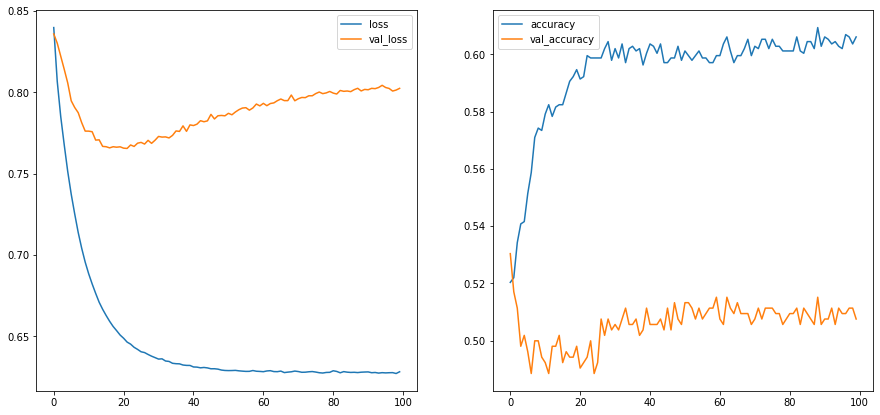

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test,y_test[:,0])

24/24 [==============================] - 0s 2ms/step - loss: 0.8228 - accuracy: 0.4993


[0.8227639198303223, 0.4993342161178589]

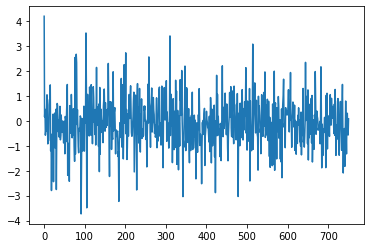

In [ ]:
plt.plot(model(X_test).numpy().reshape(-1))